# Обработка алгоритмами датасета маммонтов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP
from sklearn.manifold import TSNE
from trimap import TRIMAP
from pacmap import PaCMAP

## Обработка данных

In [2]:
mammoth_data = pd.read_csv('./mammoth.csv')

In [3]:
mammoth_data.head(5)

,x,y,z
0,58.823,228.407,79.843
1,59.197,228.642,77.478
2,58.734,228.931,78.515
3,59.043,228.693,78.571
4,59.223,228.667,78.611


In [4]:
mammoth_data.isna().sum()

x    0
y    0
z    0
dtype: int64

In [24]:
mammoth_sample = mammoth_data.sample(10000, random_state=52)

In [25]:
mammoth_arr=np.array(mammoth_sample)

#### Задание значения перплексии и random_seed

In [26]:
perplexity = 50
random_seed = 52

### T-SNE

c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


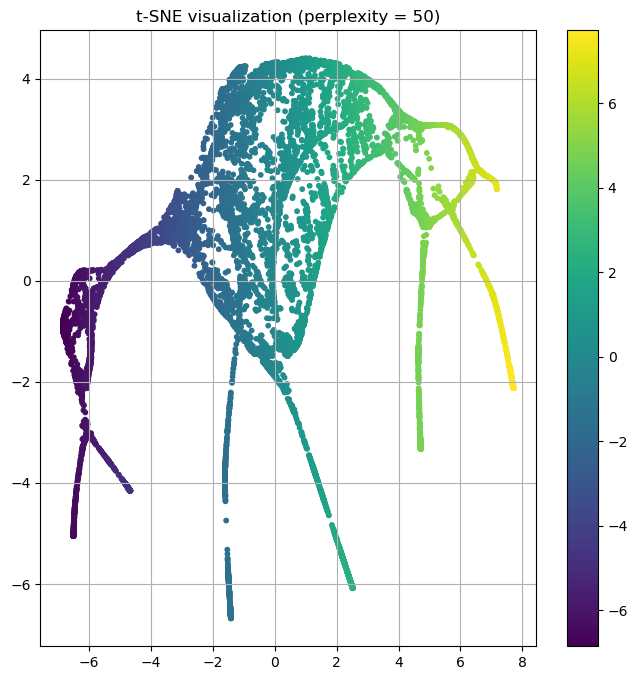

CPU times: total: 7.61 s
Wall time: 11 s


In [27]:
%%time

tsne = TSNE(random_state=random_seed, perplexity=perplexity,n_components=2, n_iter=250).fit_transform(mammoth_sample)

plt.figure(figsize=(8, 8))
plt.scatter(tsne[:, 0], tsne[:, 1], s=10, c=tsne[:, 0], cmap='viridis')
plt.title(f't-SNE visualization (perplexity = {perplexity})')
plt.grid(True)
plt.colorbar()
plt.show()

### UMAP

In [39]:
mammoth_arr[:,2]

array([  81.002, -137.093,  103.312, ...,   84.947,    0.96 , -150.268])

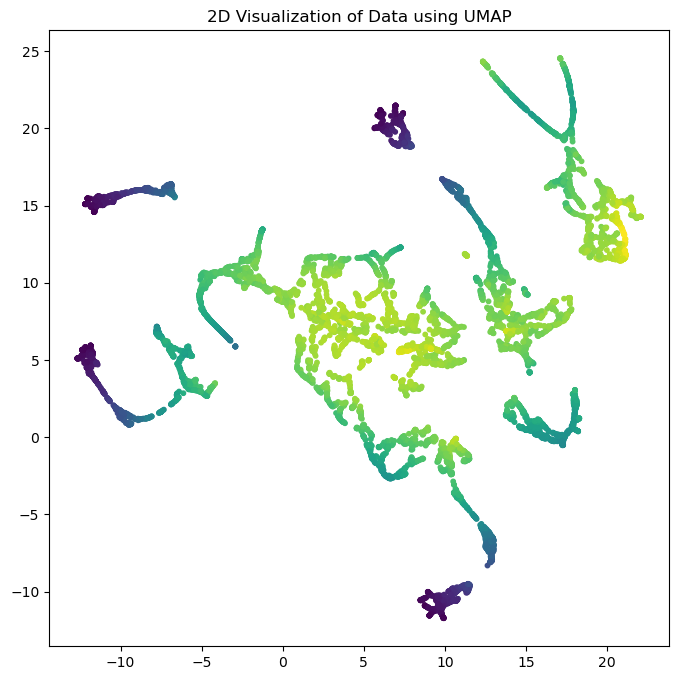

CPU times: total: 5.55 s
Wall time: 6.52 s


In [42]:
%%time

umap = UMAP(n_neighbors=15, min_dist=0.1).fit_transform(mammoth_arr)

plt.figure(figsize=(8, 8))

plt.scatter(umap[:, 0], umap[:, 1], s=10, c=mammoth_arr[:,2], cmap='viridis')

plt.title('2D Visualization of Data using UMAP')

plt.show()

### TRIMAP

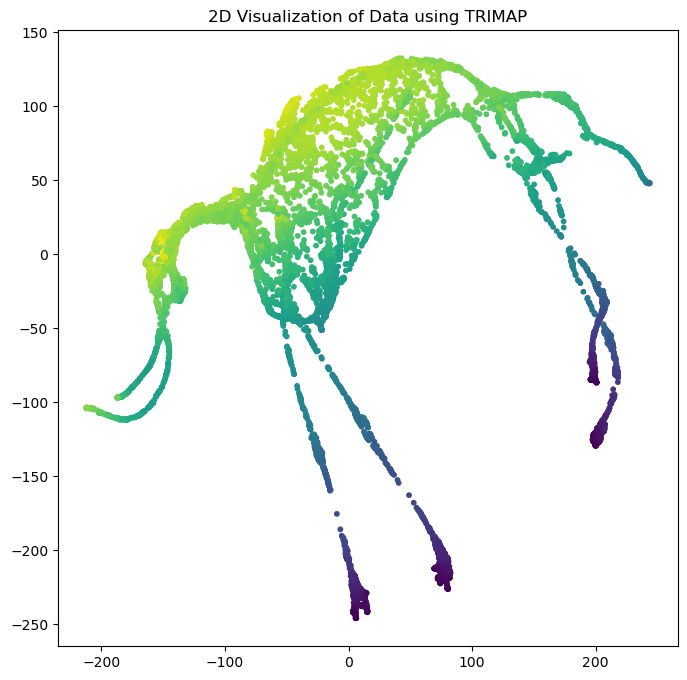

CPU times: total: 1.36 s
Wall time: 2.63 s


In [43]:
%%time

trimap = TRIMAP(n_iters=250).fit_transform(mammoth_arr)

plt.figure(figsize=(8, 8))

plt.scatter(trimap[:, 0], trimap[:, 1], s=10, c=mammoth_arr[:,2], cmap='viridis')

plt.title('2D Visualization of Data using TRIMAP')

plt.show()

### PACMAP

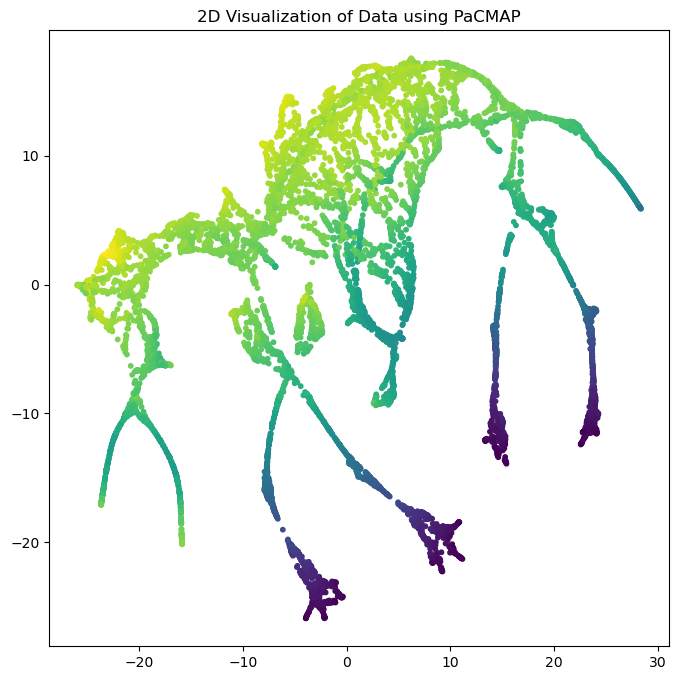

CPU times: total: 812 ms
Wall time: 2.33 s


In [44]:
%%time

pacmap = PaCMAP(num_iters=250).fit_transform(mammoth_arr)

plt.figure(figsize=(8, 8))

plt.scatter(pacmap[:, 0], pacmap[:, 1], s=10, c=mammoth_arr[:,2], cmap='viridis')

plt.title('2D Visualization of Data using PaCMAP')

plt.show()